# Import the libraries needed for the project:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

# Question 1: 
## Read the file "EU_Ref.csv” data into a pandas data frame and show the first few rows of data. What are the datatypes of each variable? Carry out some checks on the data.  Are there any missing values?  Show some descriptive values; means, min, max, etc. 

### Read the CSV file into a pandas dataframe.

In [2]:
#Load the file "Eu_Ref.csva"
df = pd.read_csv("EU_Ref.csv") 

### Show the first few rows of the data using the .head method:

In [3]:
#.head() method displays the first n rows of the data. default set as 5.
df.head()

,pensionergrowth20012011,ResidentAge30to44share,ResidentAge45to59share,ResidentAge60plusshare,median_hourly_pay_growth,EU_2001Migrantshare,NONEU_2001Migrantshare,EU_Migrantgrowth,NONEU_Migrantgrowth,economic_activity_rate_aps2015,Total_EconomyEU_dependence,TREATED_WITHIN_62_DAYS,life_sat_cv,quall1_2001_sh,quall2_2001_sh,quall3_2001_sh,quall4plus_2001_sh,CouncilRented2001,PublicEmploymentGrowth,leaveeu
0,0.125610,0.222354,0.186862,0.214906,0.341963,0.004085,0.011940,0.005722,0.005496,71.4,0.088,80.11,0.71,0.162989,0.186763,0.060077,0.114064,0.197646,-0.025287,1
1,0.067761,0.216425,0.175159,0.195996,0.377622,0.006726,0.032650,0.010700,0.030981,72.2,0.088,80.11,0.73,0.165037,0.192328,0.077535,0.128277,0.209774,-0.021338,1
2,0.143282,0.213330,0.201931,0.224830,0.159703,0.005362,0.012858,0.002638,-0.001488,73.9,0.088,78.24,0.70,0.173792,0.193903,0.062492,0.124684,0.195575,-0.066110,1
3,0.182932,0.231654,0.192161,0.197110,0.194340,0.005723,0.021843,0.005588,0.013794,78.9,0.088,80.11,0.67,0.179923,0.207027,0.068872,0.151730,0.171823,-0.042663,1
4,0.153059,0.223850,0.195425,0.222705,0.353591,0.009608,0.020575,0.015781,0.007962,77.8,0.088,64.71,0.63,0.170457,0.199309,0.067250,0.164564,0.142948,0.022609,1


### Datatypes of each variable:

In [4]:
#print the datatypes using the .dtypes method
print(df.dtypes)

pensionergrowth20012011           float64
ResidentAge30to44share            float64
ResidentAge45to59share            float64
ResidentAge60plusshare            float64
median_hourly_pay_growth          float64
EU_2001Migrantshare               float64
NONEU_2001Migrantshare            float64
EU_Migrantgrowth                  float64
NONEU_Migrantgrowth               float64
economic_activity_rate_aps2015    float64
Total_EconomyEU_dependence        float64
TREATED_WITHIN_62_DAYS            float64
life_sat_cv                       float64
quall1_2001_sh                    float64
quall2_2001_sh                    float64
quall3_2001_sh                    float64
quall4plus_2001_sh                float64
CouncilRented2001                 float64
PublicEmploymentGrowth            float64
leaveeu                             int64
dtype: object


The LeaveEU variable is the only variable that is an integer and the rest are floats. This makes sense because LeaveEU is binary outcome that only has 2 outcomes: leave(1) or remain(0) so no decimal points are needed in the dataframe for this variable. All other variables are floats showing they store decimals. This makes sense because they largely continuous variables meaning they need decimals places hence will be stored as floats in the dataframe.

### Show some descriptive values of the data:

In [5]:
#use the .describe() method to show descriptive values of the data
df.describe()

,pensionergrowth20012011,ResidentAge30to44share,ResidentAge45to59share,ResidentAge60plusshare,median_hourly_pay_growth,EU_2001Migrantshare,NONEU_2001Migrantshare,EU_Migrantgrowth,NONEU_Migrantgrowth,economic_activity_rate_aps2015,Total_EconomyEU_dependence,TREATED_WITHIN_62_DAYS,life_sat_cv,quall1_2001_sh,quall2_2001_sh,quall3_2001_sh,quall4plus_2001_sh,CouncilRented2001,PublicEmploymentGrowth,leaveeu
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.181742,0.223833,0.195141,0.215259,0.236455,0.013070,0.051743,0.021930,0.023036,78.750133,0.096997,82.712918,1.174244,0.177062,0.195722,0.078948,0.193253,0.123627,-0.030293,0.694960
std,0.101397,0.019002,0.020083,0.036817,0.087039,0.010605,0.062797,0.021905,0.029422,4.489320,0.031558,7.740290,0.459731,0.034385,0.025595,0.020297,0.070054,0.079888,0.025603,0.461036
min,-0.137270,0.169351,0.112638,0.122608,-0.091790,0.003287,0.006623,0.000701,-0.021239,65.600000,0.033000,33.300000,0.570000,0.061569,0.118437,0.041499,0.084577,0.004096,-0.166667,0.000000
25%,0.115162,0.213457,0.185986,0.194045,0.177477,0.007101,0.018864,0.008882,0.005508,75.800000,0.081000,78.650000,0.750000,0.161471,0.182131,0.065154,0.146574,0.070255,-0.043831,0.000000
50%,0.185650,0.222597,0.198696,0.212123,0.235431,0.010130,0.030538,0.014614,0.011328,79.000000,0.095000,82.670000,1.130000,0.175110,0.201464,0.074371,0.177198,0.109264,-0.028928,1.000000
75%,0.255083,0.233836,0.209006,0.232836,0.289899,0.015532,0.051653,0.025241,0.029897,81.900000,0.130000,87.220000,1.480000,0.188906,0.213945,0.087977,0.225243,0.169505,-0.015627,1.000000
max,0.439829,0.291694,0.232213,0.360392,0.661098,0.112258,0.381620,0.137645,0.179379,92.600000,0.147000,100.000000,3.050000,0.297112,0.247958,0.190120,0.515300,0.423369,0.035897,1.000000


The descriptive values of the data here are interesting when looking at the LeaveEU variable. The mean is shown as 69% leave voters which is interesting because the overall UK average was 52% and is already telling us that this data is from a high leave area since it is above the UK average. 

### Checks on the data: is there any missing data?

In [6]:
#the is.null method checks whether there are any gaps in the data. 
df.isnull().sum()

pensionergrowth20012011           0
ResidentAge30to44share            0
ResidentAge45to59share            0
ResidentAge60plusshare            0
median_hourly_pay_growth          0
EU_2001Migrantshare               0
NONEU_2001Migrantshare            0
EU_Migrantgrowth                  0
NONEU_Migrantgrowth               0
economic_activity_rate_aps2015    0
Total_EconomyEU_dependence        0
TREATED_WITHIN_62_DAYS            0
life_sat_cv                       0
quall1_2001_sh                    0
quall2_2001_sh                    0
quall3_2001_sh                    0
quall4plus_2001_sh                0
CouncilRented2001                 0
PublicEmploymentGrowth            0
leaveeu                           0
dtype: int64

The .null() method allows us to check for gaps in the data. Combining this with the sum() method allows us to check how many, if any, that individual variable has. The results here show that there is no missing data which is good because if there were, the data is less accurate and we might come to the wrong conclusions later on.

### Check on the data: is there duplicate records?

In [7]:
#duplicated() method checks for duplicated record
df.duplicated().sum()

0

This check on the data shows that there are no duplicated records in this data frame which is good because otherwise it could create skews in the data by making one record more powerful than another. 

# Question 2: 
## Define the y vector to contain the variable “leaveeu”.  Define an X matrix to contain all other variables.  Use the sklearn StandardScaler to normalise the x values.  Split the data into training and test data using a suitable test/train split such as 20%.

### Set up the X and Y matrices:

In [8]:
#Set the y vector
Y = df['leaveeu']

#Set the X matrix
X = df.drop('leaveeu', axis=1)

### Split into test and training set:

In [9]:
#test/train split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Standardise:

In [10]:
#standardise the x matrix: scale for both the test and training data:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Firstly, the x matrix is created containing all variables apart from the leaveEU variable since that is the what should be on the y axis. The leaveEU variable is added to the y vector. Then the data is split into a test/training set. The training data is the sample that is used to build the model and the testing data is the sample outside of the sample used for testing the model. This test/train split is done using the libary from sklearn. Finally in this queston, the data is standardised. Standardisation is done in order to keep records consistent and ready to be regressed in the upcoming questions.

# Question 3: 

## Estimate a linear probability model (OLS) as follows: 
 
## 𝑙𝑒𝑎𝑣𝑒𝑒𝑢𝑖 = 𝛽0 +𝛽1𝑋𝑖′𝑠+𝜀𝑖 
 
## where the X’s are all variables in the data.  Using the tests data obtain the fitted values from this model. Comment on the range of estimated probabilities.  Define a new variable that is the predicted class (based on a threshold probability of 0.5). 

In [11]:
#fit into a linear model:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,Y_train)
coef = pd.Series(linear_model.coef_, index = X.columns)

In [12]:
#print the coefficient results
print(coef)

pensionergrowth20012011           0.096546
ResidentAge30to44share            0.057501
ResidentAge45to59share           -0.087878
ResidentAge60plusshare            0.062488
median_hourly_pay_growth         -0.018740
EU_2001Migrantshare               0.137117
NONEU_2001Migrantshare           -0.072764
EU_Migrantgrowth                 -0.024014
NONEU_Migrantgrowth               0.050680
economic_activity_rate_aps2015    0.000173
Total_EconomyEU_dependence        0.097245
TREATED_WITHIN_62_DAYS            0.013699
life_sat_cv                       0.043793
quall1_2001_sh                   -0.181227
quall2_2001_sh                    0.052123
quall3_2001_sh                   -0.091374
quall4plus_2001_sh               -0.377183
CouncilRented2001                -0.003095
PublicEmploymentGrowth           -0.017495
dtype: float64


Text(0.5, 1.0, 'Variable importance using OLS Model')

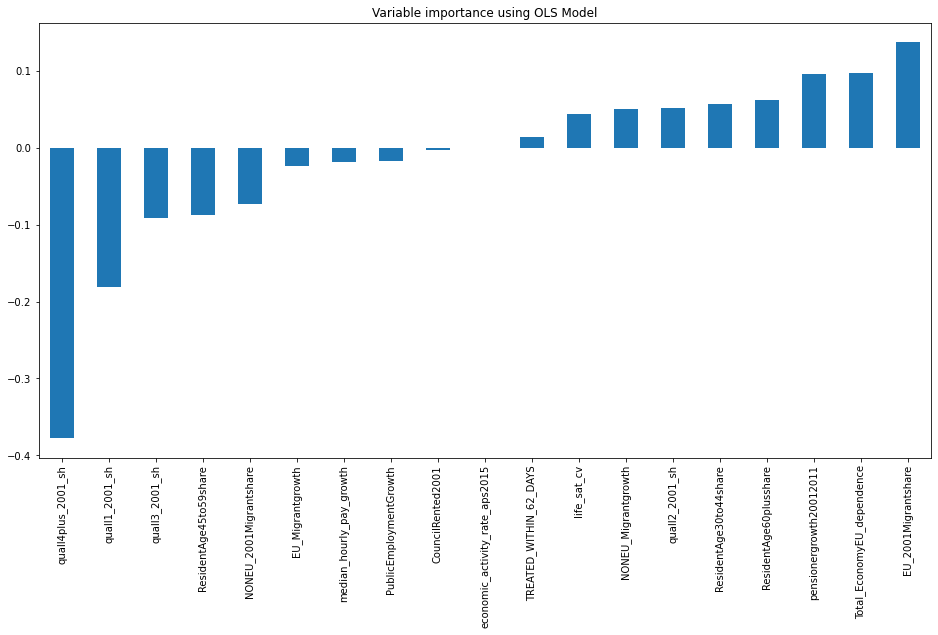

In [13]:
#coefficents significance shown in a chart
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (16.0, 8.0)
imp_coef.plot.bar()
plt.title("Variable importance using OLS Model")

In [14]:
#Fitted values of the testing data:
Y_prediction = linear_model.predict(X_test_scaled)

In [15]:
#print the range of possible probabilities:
print(f"The minimum proability is: {min(Y_prediction):.2f} and the maximum probability is: {max(Y_prediction):.2f}")

The minimum proability is: -0.21 and the maximum probability is: 1.25


In [16]:
#Predicted class based on a threshold of 0.5:
def binary(x):
    if x>=0.5:
        y=1
    else:
        y=0
    return y
vbinary=np.vectorize(binary)
Y_pred_class=vbinary(Y_prediction)
pd.Series(Y_pred_class).describe()

count    76.000000
mean      0.736842
std       0.443273
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

This section of the assignment has created a linear model for the data. Shown how significant each variable's coefficient is in a diagram. Fitted the test data and shown the possible probabilities and created a predicted class based on a threshold of 0.5. From the diagram, the quall4plus variable has the most significant -ve coefficent, and the EU_2001_migrantsshare has the most +ve coefficient. This shows that the higher the EU migrants share, the more likely they would vote for Brexit. And the qualifications 4 plus shows that having 4 qualifications means you were less likely to vote for Brexit. The predicted class here uses a threshold of 0.5. This means to be added to this class, the model has to predict that your probability of voting for Brexit needs to be at least 0.5. There are 76 values in this and the mean is 0.73 meaning 73% were Brexit voters, higher than the 69% for the data as a whole. From the minimum and maximum probabilities there is a problem since they lie outside of 0-1, this problem will be discussed in more detail when it comes to the logistic model.

# Question 4:
### Obtain the confusion matrix, accuracy score and classification report in the tests data.  Briefly discuss these difference performance metrics, explaining each concept.  What do the precision and recall score indicate?  

### Create the Confusion Matrix and discuss:

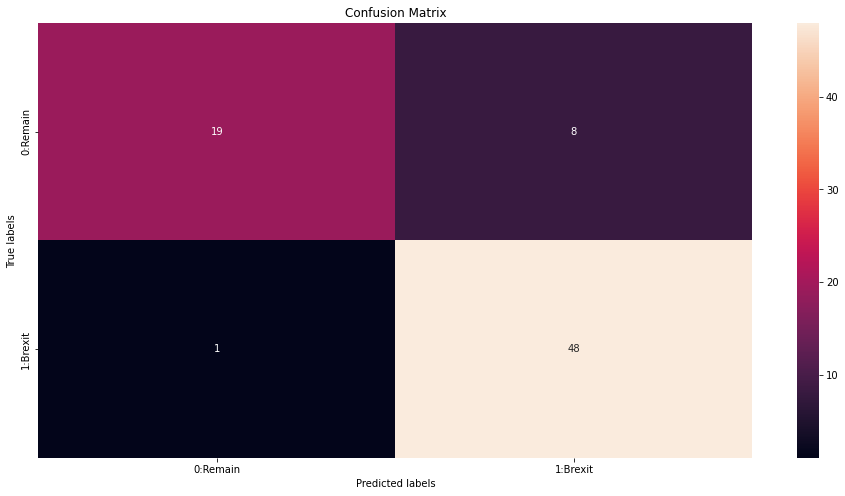

In [17]:
# obtain the confusion matrix for the predicted classes
cm = confusion_matrix(Y_test, Y_pred_class)

#seaborn is a visualisation library based on matplotlib
import seaborn as sns

#create the confusion matrix diagram using matplotlib subplot method()
cm_diagram= plt.subplot()

#create a heatmap showing a 'heat' when there is a lot of data in one area
#annot = true allows for annotation and ftm = g disables scientific notation
sns.heatmap(cm, annot=True, fmt='g', ax=cm_diagram); 

# labels, title and ticks
cm_diagram.set_xlabel('Predicted labels')
cm_diagram.set_ylabel('True labels'); 
cm_diagram.set_title('Confusion Matrix'); 
cm_diagram.xaxis.set_ticklabels(['0:Remain', '1:Brexit']);cm_diagram.yaxis.set_ticklabels(['0:Remain', '1:Brexit']);


A confusion matrix shows the predicted values on one axis against the true values on the other axis. This allows us to see the errors in our model i.e. the false positives and the false negatives. A false positive in this incidence occurs when the model predicts the individual is a Brexit voter but is in fact a Remain voter. A false negative occurs when the model predicts the individual to be a Remainer but is in fact a Brexiter. This confusion matrix has a total of 76 data points. It has successfully 67 of these. The remaining 9 are split into 8 false positive since our model predicted them as Brexit when they were remain and 1 false negative since our model predicted the individual as a Brexit voter when they were a remain voter.

### Accuracy Score:

In [18]:
#calculate the accuracy score for the predicted classes using the accuracy_score method.
ac_score = accuracy_score(Y_test, Y_pred_class)

#print the accuracy score:
print(f"The Accuracy Score is: {ac_score}")

The Accuracy Score is: 0.881578947368421


The Accuracy Score here shows how many points of data are model predicted accuractely. Since from the confusion matrix there were 9 errors out the 76 data points, it successfully predicted 67 points. Therefore, 67/76 = 0.88157... 

### Classification Report:

In [19]:
# obtain the classification report for the predicted classes using the classification report method.
cl_report = classification_report(Y_test, Y_pred_class)
print(f"The Classification report is:\n {cl_report}")

The Classification report is:
               precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.86      0.98      0.91        49

    accuracy                           0.88        76
   macro avg       0.90      0.84      0.86        76
weighted avg       0.89      0.88      0.88        76



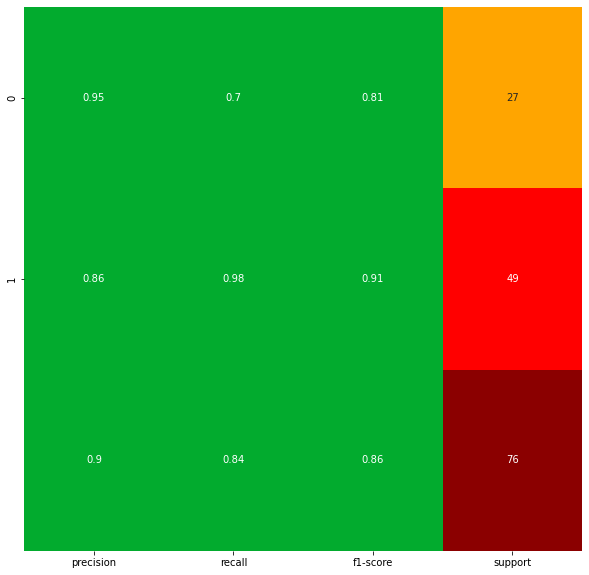

In [37]:
from sklearn.metrics import precision_recall_fscore_support
#function for creating a classification report diagram
def plot_classification_report(Y_test, Y_pred_class, figsize=(10, 10), ax=None):
    my_colors=['#02ab2e','orange','red', 'darkred']
    #create the figure
    plt.figure(figsize=figsize)

    #label the axis uses 'ticks'
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(Y_test))
    #ticks += ['avg']

    rep = np.array(precision_recall_fscore_support(Y_test, Y_pred_class)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    #add the info to the digram
    sns.heatmap(rep,
                annot=True, 
                cbar=False,
                cmap = my_colors,
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)
    
#call the plot_classification_report function using the data from the earlier tests   
plot_classification_report(Y_test, Y_pred_class)

The classification report helps us to understand how well our model has performed. It shows the precision score and recall score. These will be analysed in more detail in the next section. It also shows the f1-score and the support score. The f1-score is the weighted average of the precison and recall score, and the support score shows the number of actual occurences of the class in the dataset.

### What do the precision and recall scores indicate?

Recall is the fraction of actual cases correctly identified. Taking the positive case scenario, it is the fraction of positive cases idenified over the total positive cases. It can also be called the true positive rate/sensitivity. So to calculate it in this case, there were 48 positive cases identified and 49 total. This gives a precision of 0.98 which can be seen for the recall positive cases in the diagram above.

Precision is the fraction of predicted positive cases correctly identified. Taking the positive example again, there were 48 positive cases identified and 56 cases in total. 48/56 gives a precision score of 0.86 in this case and can be seen for the positive case for the precision score in the diagram above.

These scores are both useful tools for data science since it allows us to get a gage for how accurate are model is. However, the better method to use depends on the circumstances. For example, running a test for a health condition would need a high recall score since a false positive can be followed up with another test to confirm the diagnosis and helps to protect hospital staff and other patients. However, if an algorithm is creating a spotify playlist for a user it will want a high level of precision since any false positives will annoy the user and they will create their own playlist.



# Question 5:
### Explain why we use the test data to evaluate the model performance rather than the training data.  What will happen to the accuracy score in the training data as we make our model more complex?  What about the accuracy score in the test data?

The training data is the sample that is used to build the model and the testing data is the sample outside of the sample used for testing the model. (add here why we use the testing data)

As we make the model more complex, the accuracy score in the training data will go down.The training mean squared error (MSE) will go down since we are fitting closer to the training data. However, this does not necessarily mean that the test data MSE will also go down. The training MSE will definietly go down because we will be working hard to finding patterns in the training MSE with a complex model. However, if the small training MSE causes a higher test MSE then we are working hard to find patterns in our training data and picking up on some patterns that are caused by error noise and do not occur in the testing data. As we increase the complexity we fit more towards our training data.

Additonally, increasing complexity causes a decrease in bias and an increase in variance which is called the bias/variance trade off. Eventually, adding more complexity is not worthwile since the decrease in bias will not outweigh any benefit from a increase in variance. Since the overall MSE comes down to both the variance and the bias, in the testing data, there will be a certain point where adding complexity will cause too much increase in variance that the overall MSE begins to go up. However, this does not happen with the training MSE since adding complexity just adds a closer fit to the training data but this does not necessarily mean that adding complexity is the answer because there can be error noise in the training data. We want to create a model which finds a middle ground in this bias/variance trade off.




<div>
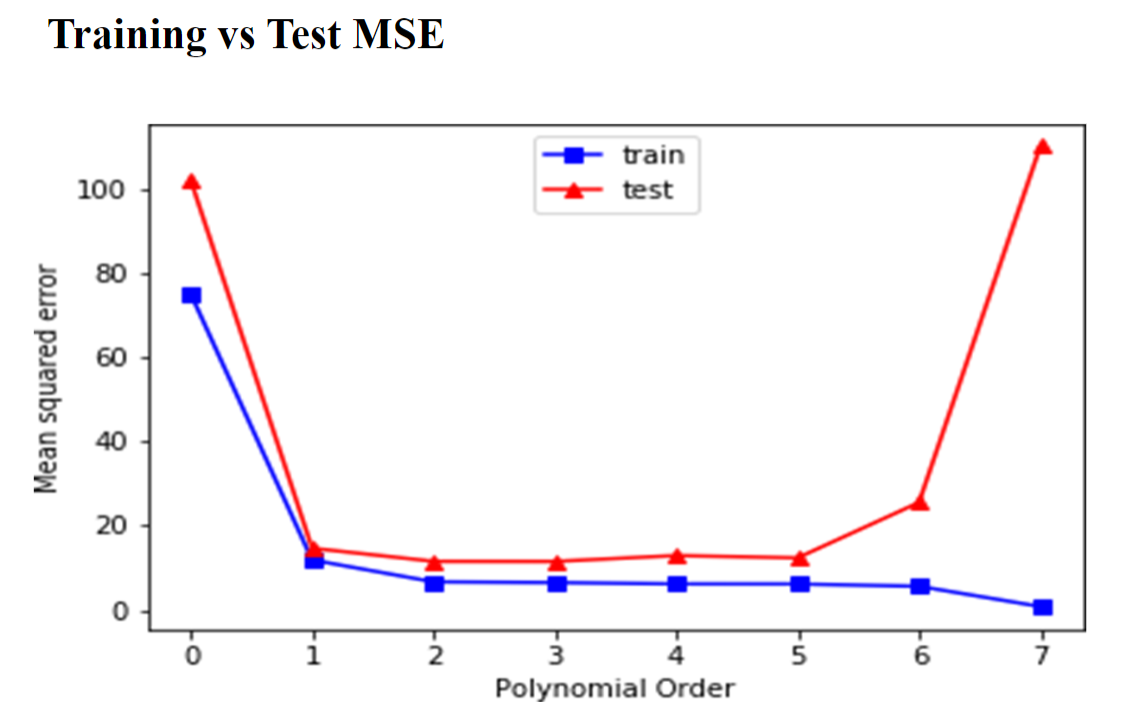
</div>

# Question 6:
### Briefly explain why a logit model might be a more appropriate model to use here instead of the linear probability model. 

Since our model has a binary outcome (leave 1 or remain 0), regression by OLS is not completely unreasonable since the B̂X found using OLS is an estimate of P(leave|X). However, the problem with OLS here and why a logistic model will be more benefical is because in OLS some values are outside of 0 and 1. This can be seen in an earlier section where the minimum probability was -0.21 and the maximum probability was 1.25 and therefore is outside of the 0-1 range. The problem with this is that it becomes hard to interpret because how can someone who voted for Brexit be worth anymore than 1 in this model? 

OLS can be used for quite crude estimates when there are two responses like in the Brexit/Remain case. However, in another case where there were more than 2 outcomes, OLS will be more severly disadvantaged when compared with a logistic since OLS cannot accomodate a qualitative response with more than 2 cases. For example, if you were rating a hotel between 0 and 10, the value of going from 9 to 10 will not be worth the same as going from 1-2. 

To avoid the problem of values being outside of this 0-1 range, the logit model is more appropriate since an S-shape curve is created using the maximum likelihood method. This means that regardless of the X-values we will still reach a sensibile prediction for the model. Additonally, the logit will also be better because we are no longer assuming a linear relationship between variables because of this S-shape curve which is generally a better fit for binary responses. 

Furthermore, the logit gives us results which are easy to understand and are called log-odd ratios. These are very closely related to probability and are therefore easy to interpret. On the other hand, a linear models estimates are very crude as mentioned earlier and may give an insight to whats going on, but they generally cannot be directly interpreted as probabilities.

# Question 7:
### Estimate the model in Q3 but now using a logit model.  Obtain the fitted values and the confusion matrix, accuracy score and classification report.  Comment on the difference with the linear probability model above.

### Estimate the logit model:

In [21]:
# Normalize the feature variables
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

#normally split the train/test data:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.2, random_state=42)

#esimate the logit model
logit = LogisticRegression(penalty="none",max_iter=250)
logit.fit(X_train, Y_train)


LogisticRegression(max_iter=250, penalty='none')

In [22]:
# Obtain the fitted values on the test set
Y_pred_logit = logit.predict(X_test)

### Logit Confusion Matrix:

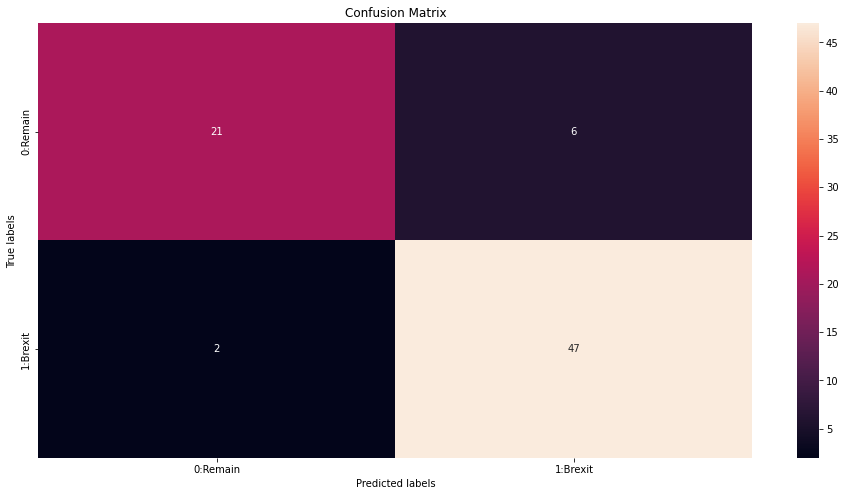

In [23]:
# Create the confusion matrix
logit_cm = confusion_matrix(Y_test, Y_pred_logit)

#create the confusion matrix diagram using matplotlib subplot method()
logit_cm_diagram= plt.subplot()

#create a heatmap showing a 'heat' when there is a lot of data in one area
#annot = true allows for annotation and ftm = g disables scientific notation
sns.heatmap(logit_cm, annot=True, fmt='g', ax=logit_cm_diagram); 

# labels, title and ticks
logit_cm_diagram.set_xlabel('Predicted labels')
logit_cm_diagram.set_ylabel('True labels'); 
logit_cm_diagram.set_title('Confusion Matrix'); 
logit_cm_diagram.xaxis.set_ticklabels(['0:Remain', '1:Brexit']);logit_cm_diagram.yaxis.set_ticklabels(['0:Remain', '1:Brexit']);


### Logit Accuracy Scores:

In [24]:
#calculate the logit accuracy scores:
logit_ac_score = accuracy_score(Y_test, Y_pred_logit)
print('Accuracy Score:', logit_ac_score)

Accuracy Score: 0.8947368421052632


### Logit Classification Report:

In [25]:
#create the logit classification report:
class_report = classification_report(Y_test, Y_pred_logit)

#print classification report
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.89      0.96      0.92        49

    accuracy                           0.89        76
   macro avg       0.90      0.87      0.88        76
weighted avg       0.90      0.89      0.89        76



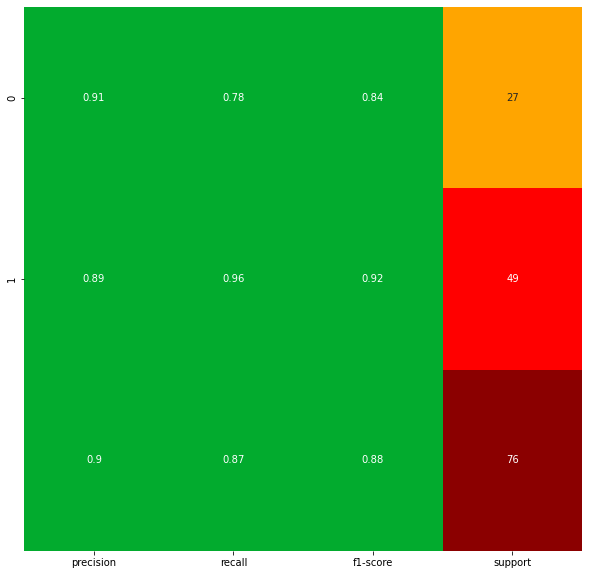

In [26]:
#call the plot_classification_report function using the data from the logit test   
plot_classification_report(Y_test, Y_pred_logit)

### Comments on the difference between the Linear probability model and the Logit Model:


These results show that the logit model is a better predictor than the linear probability model as we would have expected from the theory in question 6. This can be seen by the f1-score which combines the averages of the precision and recall score to give 0 a score of 0.84 and 1 a score of 0.92. This is higher than the f1-score n the linear probability model where 0 had a score of 0.81 and 1 had a score of 0.91. The overall accuracy score is also higher in the logit model at 0.8947 in the logit and 0.881 in the linear probability model.

Also information from the confusion matrix shows there are less errors seen in the logit model with 6 false positives and 2 false negatives so 8 in total. Compared with 8 false positives in the linear probability model and 1 false negative giving 1 less error in the logit model.

Additonally, the logit model here has kept the values between 0 and 1 which the linear probability model did not. 

Overall, the logit model helps to overcome many of the drawbacks of a linear probability model, and the results for the accuracy tests here show that it is much more accurate as well. 

# Question 8:
### Estimate the logit model but applying a penalty term such as Lasso or Ridge.   

### Lasso Regression:

In [27]:
#create the lasso regression, c shows the penalty size and l1 tells python it is a lasso.
lasso=LogisticRegression(C=0.1, penalty='l1',solver="liblinear")

#fit the model
lasso.fit(X_train, Y_train)

#print the coefficients
lasso.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.59765658,  0.        ,  0.22760295, -0.0982893 ,  0.69718434,
        -0.01593394, -1.92705218,  0.        ,  0.        ]])

In [28]:
#find the predicted values
Y_pred_lasso=lasso.predict(X_test)

In [29]:
#lasso confusion matrix:
lasso_cm = confusion_matrix(Y_test, Y_pred_lasso)
print (lasso_cm)

[[19  8]
 [ 3 46]]


In [30]:
#lasso accuracy score:
lasso_as = accuracy_score(Y_test, Y_pred_lasso)
print(f"The lasso accuracy score is: {lasso_as}")

The lasso accuracy score is: 0.8552631578947368


### Ridge Regression:

In [31]:
#create the ridge regression, c shows the penalty size and l2 tells python it is a ridge.
ridge=LogisticRegression(C=0.1, penalty='l2',solver="liblinear")

#fit the model
ridge.fit(X_train, Y_train)

#show the coefficients for ridge
ridge.coef_

array([[ 0.12377449, -0.17333681, -0.25145256, -0.02157441, -0.16212591,
        -0.24376654, -0.23745114, -0.01002511,  0.18726718, -0.1035608 ,
         0.67242706, -0.08545685,  0.43380267, -0.28825235,  0.60043667,
        -0.5013748 , -1.31795028, -0.06235967,  0.01678589]])

In [32]:
#find ridge predicted values
Y_pred_ridge=ridge.predict(X_test)

In [33]:
#ridge confusion matrix:
ridge_cm = confusion_matrix(Y_test, Y_pred_ridge)
print (ridge_cm)

[[20  7]
 [ 2 47]]


In [34]:
#ridge accuracy score:
ridge_as = accuracy_score(Y_test, Y_pred_ridge)
print(f"The ridge accuracy score is: {ridge_as}")

The ridge accuracy score is: 0.881578947368421


### Additonal Comments:
A penalised regression model tries to find the 𝛽′𝑠 that minimise the error sum of squares and also the penalty function. The difference between Lasso and Ridge is that in the Lasso model, the penalty function is the sum of the absolute 𝛽′𝑠 and in Ridge, the penalty function is the sum of the squared 𝛽′𝑠. For this reason, in Lasso some of the 𝛽′𝑠 are forced all the way to zero (depending on the size of the penalty), whereas in Ridge they shrink very close to zero but never actually go to zero. This theory can be seen by the code in this section of the assignment, since in the Lasso example several 𝛽′𝑠 go all the way to zero but this is not the case in Ridge where they just become very small.

The accuracy score of the lasso is the lowest accuracy score found so far when compared with ridge, OLS and the non-penalised logit. The accuracy score for ridge is 0.882 (3dp) which puts it higher than ridge and OLS but still slightly behind the logit. It is expected to be lower than the logit because the logit does not have any penalty function and therefore despite the slightly higher accuracy score in logit, it still has the problem of overfitting the data. Compared with the Lasso and Ridge which give up a bit of error when it comes to bias for a significant amount less variance than the overfitted logit.

It is interesting here that the accuracy score of Ridge is better than the score for Lasso. This may tell us that Ridge is better for this model as Ridge tends to do better if most of the X's do matter and have similar sized coefficients. We already know that this is the case for this dataset from the chart created in question 3. While there were two coefficients at either end that were much bigger than the rest, most coefficients were fairly small and similar and for this reason completely omitting the variables like in a Lasso will not be good in this case. This could explain why the Ridge achieved a better accuracy score than Lasso for this dataset.



# Question 9: 
### Explain the role of the penalty parameter λ in this model.  Explain how one can use cross validation to find the optimal parameter. 

The Penalty parameter is used to stop an overfit and reduce the variance. Want to find the optimal though and that comes down to the bias/variance trade off discussed earlier. Want a penalty that stops overfitting to reduce the variance but don't want that penalty to reduce variance too much because then there will be too much bias again from an underfitted model. But the theory is that if the optimal penalty parameter is found then you can get a big reduction in variance at only a small cost to bias. The penalty parameter works in a penalty function which acts as a cost to added complexity and reduces overfitting. Two methods for doing this were discussed in the previous question called Ridge and Lasso. Both have different methods for creating the penalty function (discussed previously) but both have the same intuition behind the penalty parameter: impose a cost on complexity to reduce overfitting. 

Cross Validation is a method for finding this optimal penalty parameter. The data is split into different 'folds' (essentially subsets and the number of subsets can be decided by the individual) then the model is trained on one fold and validated against a different fold. This is repeated for all folds and the average of all folds helps to evaluate the models performance. This Cross Validation method helps to find the best penalty parameter because the penalty parameter can be tuned on several different repeats through to reach an optimal penalty parameter that gives the highest accuracy (or lowest error).

# Question 10:
### Use cross validation (such as LogisticRegressionCV or GridSearchCV) to find the optimal penalty parameter for the model in Q8.  Comment on your results.

In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Fit the model on the training data
opt_pen = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', solver='lbfgs', max_iter=1000)
opt_pen.fit(X_train, Y_train)

# Get the optimal value of the penalty parameter
print(f"Optimal penalty parameter: {opt_pen.C_}")


Optimal penalty parameter: [166.81005372]


### Additonal Comments:
The model has determined that the ideal penalty paramter is 166.8. This shows that a high degree of penalisation is needed to prevent an outfitted model.

